### CatBoost

O CatBoost é um algoritmo de classificação que se destaca pela sua capacidade de lidar com dados categóricos, fornecendo resultados precisos e eficientes em treinamento. Com recursos avançados de tratamento de dados e prevenção de sobreajuste, o CatBoost é uma escolha popular em diversas aplicações, desde análise de fraudes até sistemas de recomendação.

In [ ]:
# Importando as bibliotecas
import catboost
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
# Lendo os dados
df = pd.read_csv('../output/word2vec_corpus.csv')

In [9]:
# Separando os dados em features e target
X = df.drop(['Frase', 'sentimento'], axis=1)
y = df['sentimento']

In [10]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Treinando o modelo
model = CatBoostClassifier(iterations=200, learning_rate=0.1)
model.fit(X_train, y_train)

0:	learn: 1.0639060	total: 17.9ms	remaining: 3.57s
1:	learn: 1.0340517	total: 33ms	remaining: 3.26s
2:	learn: 1.0072971	total: 47.6ms	remaining: 3.12s
3:	learn: 0.9888651	total: 61.4ms	remaining: 3.01s
4:	learn: 0.9716865	total: 75.5ms	remaining: 2.94s
5:	learn: 0.9561168	total: 89.3ms	remaining: 2.89s
6:	learn: 0.9423424	total: 104ms	remaining: 2.86s
7:	learn: 0.9296575	total: 120ms	remaining: 2.87s
8:	learn: 0.9184365	total: 134ms	remaining: 2.85s
9:	learn: 0.9077782	total: 149ms	remaining: 2.83s
10:	learn: 0.8991733	total: 163ms	remaining: 2.8s
11:	learn: 0.8909466	total: 177ms	remaining: 2.78s
12:	learn: 0.8840449	total: 193ms	remaining: 2.78s
13:	learn: 0.8774891	total: 214ms	remaining: 2.85s
14:	learn: 0.8711364	total: 230ms	remaining: 2.83s
15:	learn: 0.8660115	total: 246ms	remaining: 2.83s
16:	learn: 0.8606882	total: 261ms	remaining: 2.81s
17:	learn: 0.8560870	total: 274ms	remaining: 2.77s
18:	learn: 0.8521667	total: 289ms	remaining: 2.75s
19:	learn: 0.8483411	total: 303ms	rema

172:	learn: 0.6134414	total: 2.84s	remaining: 443ms
173:	learn: 0.6130700	total: 2.85s	remaining: 427ms
174:	learn: 0.6123865	total: 2.87s	remaining: 410ms
175:	learn: 0.6112881	total: 2.89s	remaining: 394ms
176:	learn: 0.6102293	total: 2.91s	remaining: 378ms
177:	learn: 0.6086433	total: 2.92s	remaining: 361ms
178:	learn: 0.6082374	total: 2.94s	remaining: 345ms
179:	learn: 0.6071364	total: 2.96s	remaining: 329ms
180:	learn: 0.6063750	total: 2.98s	remaining: 313ms
181:	learn: 0.6055162	total: 3s	remaining: 297ms
182:	learn: 0.6047756	total: 3.02s	remaining: 281ms
183:	learn: 0.6041164	total: 3.04s	remaining: 264ms
184:	learn: 0.6033763	total: 3.06s	remaining: 248ms
185:	learn: 0.6022500	total: 3.08s	remaining: 232ms
186:	learn: 0.6011608	total: 3.1s	remaining: 215ms
187:	learn: 0.5998856	total: 3.12s	remaining: 199ms
188:	learn: 0.5986003	total: 3.13s	remaining: 182ms
189:	learn: 0.5971609	total: 3.15s	remaining: 166ms
190:	learn: 0.5964860	total: 3.16s	remaining: 149ms
191:	learn: 0.59

In [12]:
# Avaliando o modelo no conjunto de teste
accuracy = model.score(X_test, y_test)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.60


### Matriz de confusão

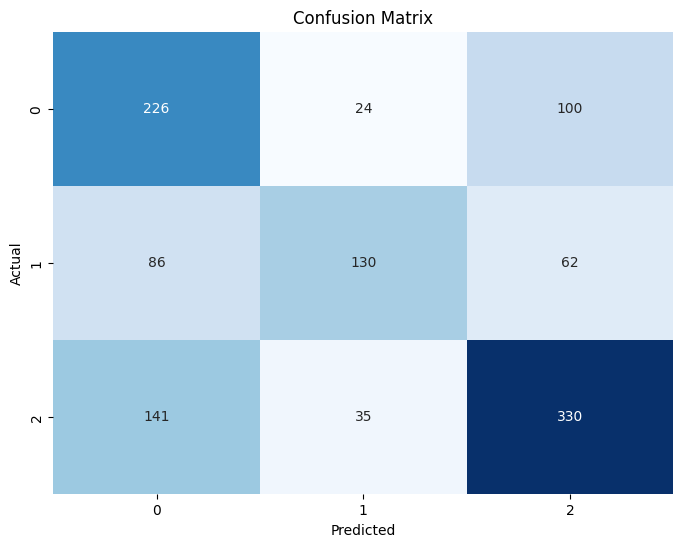

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predizendo as classes no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Recall


In [17]:
from sklearn.metrics import recall_score

# Predizendo as classes no conjunto de teste
y_pred = model.predict(X_test)

# Calculando o recall usando a média macro
recall = recall_score(y_test, y_pred, average='macro')

print(f'Recall: {recall:.2f}')


Recall: 0.59


### Precisão

In [18]:
from sklearn.metrics import precision_score

# Predizendo as classes no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a precisão usando a média macro
precision = precision_score(y_test, y_pred, average='macro')

print(f'Precisão: {precision:.2f}')


Precisão: 0.62
